### Steps to Download and load Word2vec
1. Download word2vec from https://code.google.com/archive/p/word2vec/
2. Unzip it and then upload it to the google drive

In [ ]:
from gensim.models import KeyedVectors
# Load vectors directly from the file
model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
type(model)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [ ]:
model['the']

array([ 0.08007812,  0.10498047,  0.04980469,  0.0534668 , -0.06738281,
       -0.12060547,  0.03515625, -0.11865234,  0.04394531,  0.03015137,
       -0.05688477, -0.07617188,  0.01287842,  0.04980469, -0.08496094,
       -0.06347656,  0.00628662, -0.04321289,  0.02026367,  0.01330566,
       -0.01953125,  0.09277344, -0.171875  , -0.00131989,  0.06542969,
        0.05834961, -0.08251953,  0.0859375 , -0.00318909,  0.05859375,
       -0.03491211, -0.0123291 , -0.0480957 , -0.00302124,  0.05639648,
        0.01495361, -0.07226562, -0.05224609,  0.09667969,  0.04296875,
       -0.03540039, -0.07324219,  0.03271484, -0.06176758,  0.00787354,
        0.0035553 , -0.00878906,  0.0390625 ,  0.03833008,  0.04443359,
        0.06982422,  0.01263428, -0.00445557, -0.03320312, -0.04272461,
        0.09765625, -0.02160645, -0.0378418 ,  0.01190186, -0.01391602,
       -0.11328125,  0.09326172, -0.03930664, -0.11621094,  0.02331543,
       -0.01599121,  0.02636719,  0.10742188, -0.00466919,  0.09

In [ ]:
len(model.vocab)

3000000

In [ ]:
model['the'][:100].shape

(100,)

### Now Convert genism dictionary to python dictionary in 200-D (Dimensional)

In [ ]:
embedding=dict()

for k in model.vocab:
  embedding[k]=model[k][:200]

In [ ]:
embedding['the']

array([ 0.08007812,  0.10498047,  0.04980469,  0.0534668 , -0.06738281,
       -0.12060547,  0.03515625, -0.11865234,  0.04394531,  0.03015137,
       -0.05688477, -0.07617188,  0.01287842,  0.04980469, -0.08496094,
       -0.06347656,  0.00628662, -0.04321289,  0.02026367,  0.01330566,
       -0.01953125,  0.09277344, -0.171875  , -0.00131989,  0.06542969,
        0.05834961, -0.08251953,  0.0859375 , -0.00318909,  0.05859375,
       -0.03491211, -0.0123291 , -0.0480957 , -0.00302124,  0.05639648,
        0.01495361, -0.07226562, -0.05224609,  0.09667969,  0.04296875,
       -0.03540039, -0.07324219,  0.03271484, -0.06176758,  0.00787354,
        0.0035553 , -0.00878906,  0.0390625 ,  0.03833008,  0.04443359,
        0.06982422,  0.01263428, -0.00445557, -0.03320312, -0.04272461,
        0.09765625, -0.02160645, -0.0378418 ,  0.01190186, -0.01391602,
       -0.11328125,  0.09326172, -0.03930664, -0.11621094,  0.02331543,
       -0.01599121,  0.02636719,  0.10742188, -0.00466919,  0.09

In [ ]:
import numpy as np

### Creating Embedding Matrix in 100-D (Dimensional)

**Google Colab give us 12gb ram in free version so that why we are only load and use 100-Dimensional Embedding. if we have more then 12gb ram then we can use higher dimensions**

In [ ]:
dims=100
flag=1
word_index = {w: i for i, w in enumerate(embedding, 1)}
embedding_matrix = np.zeros((len(word_index)+1, dims))
for word, i in word_index.items():
    embedding_vector = embedding.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector[:dims]
        

In [ ]:
embedding_matrix[2]

array([ 0.0703125 ,  0.08691406,  0.08789062,  0.0625    ,  0.06933594,
       -0.10888672, -0.08154297, -0.15429688,  0.02075195,  0.13183594,
       -0.11376953, -0.03735352,  0.06933594,  0.078125  , -0.10302734,
       -0.09765625,  0.04418945,  0.10253906, -0.06079102, -0.03613281,
       -0.04541016,  0.04736328, -0.12060547, -0.06396484,  0.0022583 ,
        0.03710938, -0.00291443,  0.11767578,  0.06176758,  0.06396484,
        0.08105469, -0.06884766, -0.0213623 ,  0.05517578, -0.08544922,
        0.06884766, -0.12792969, -0.03320312,  0.09863281,  0.17578125,
        0.11083984, -0.03466797, -0.04711914, -0.00848389,  0.03588867,
        0.10302734,  0.02697754, -0.02868652, -0.00512695,  0.10644531,
        0.05981445,  0.09423828,  0.03369141, -0.02709961, -0.09423828,
        0.00102997, -0.04833984,  0.03442383,  0.08105469, -0.11328125,
       -0.08886719,  0.03588867, -0.14550781, -0.24414062, -0.06152344,
        0.05297852,  0.05688477,  0.1796875 ,  0.06103516,  0.08

### Store that Embedding Matrix into numpy format in google drive then restart your google colab gpu.

In [ ]:
np.save('/content/drive/MyDrive/embedding_matrix.npy',embedding_matrix)

### Load the numpy file (embedding_matrix.npy) with out loading word2vec

In [ ]:
import numpy as np
embedding_matrix=np.load('/content/drive/MyDrive/embedding_matrix.npy')

### Using this embedding matrix any where in your problem like (Machine Translation,Seniment Analysis and NER etc.)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import string
import re
from unicodedata import normalize
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import LSTM,Dense,Embedding,RepeatVector,TimeDistributed,Bidirectional,GRU
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import corpus_bleu
import pandas as pd
from string import punctuation
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from keras.layers import Dropout


def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

In [ ]:
# How many sentences will be used
# Limit the sentences to 10.000 on Kaggle to avoid exceding the
# available RAM space
# Build a generator to avoid this issue

total_sentences = 85221

# Load the dataset
dataset = pd.read_excel("/content/drive/MyDrive/data.xlsx", nrows = total_sentences)


# What proportion of the sentences will be used for the test set
test_proportion = 0.3
train_test_threshold = int( (1-test_proportion) * total_sentences)

printmd(f'## {total_sentences} "parallel sentences" will be loaded (original sentence + its translation)')
printmd(f'## {train_test_threshold} "parallel sentences" will be used to train the model')
printmd(f'## {total_sentences-train_test_threshold} "parallel sentences" will be used to test the model')

## 85221 "parallel sentences" will be loaded (original sentence + its translation)

## 59654 "parallel sentences" will be used to train the model

## 25567 "parallel sentences" will be used to test the model

In [ ]:
# Shuffle the dataset
dataset = dataset.sample(frac=1, random_state=0)
dataset.iloc[1000:1010]

,English,PSL
42870,The chief was deciding to be a good man.,Was The chief be a good man decides to now.
3261,I have an orange and an apple.,I an orange an apple have.
73922,I had hoped to meet her there.,was I there her meet hope full.
84184,I know that Shazim is agnostic.,I know that Shazim agnostic.
79760,He is a director and should be treated as such.,He director such treat.
61886,I can not believe Anees said yes.,I believe not was Anees say.
65728,Waasif did not follow the rules.,was Waasif rules follow not.
36340,It sounds very strange to me.,It me very strange sounds.
4064,Balam took off his belt.,was Balam his belt take off.
24879,We have just got to keep going.,We just go keep get full.


In [ ]:
def clean(string):
    # Clean the string
    string = string.replace("\u202f"," ") # Replace no-break space with space
    string = string.lower()
    
    # Delete the punctuation and the numbers
    for p in punctuation + "«»" + "0123456789":
        string = string.replace(p," ")
        
        
    string = re.sub('\s+',' ', string)
    string = string.strip()
           
    return string

# Clean the sentences
dataset["English"] = dataset["English"].apply(lambda x: clean(x))
dataset["PSL"] = dataset["PSL"].apply(lambda x: clean(x))

# Select one part of the dataset
dataset = dataset.values
dataset = dataset[:total_sentences]

# split into train/test
train, test = dataset[:train_test_threshold], dataset[train_test_threshold:]

# Define the name of the source and of the target
# This will be used in the outputs of this notebook
source_str, target_str = "PSL", "English"

# The index in the numpy array of the source and of the target
idx_src, idx_tar = 1,0

In [ ]:
def create_tokenizer(lines):
    # fit a tokenizer
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer
 
def max_len(lines):
    # max sentence length
    return max(len(line.split()) for line in lines)

def encode_sequences(tokenizer, length, lines):
    # encode and pad sequences
    X = tokenizer.texts_to_sequences(lines) # integer encode sequences
    X = pad_sequences(X, maxlen=length, padding='post') # pad sequences with 0 values
    return X
 
def encode_output(sequences, vocab_size):
    # one hot encode target sequence
    ylist = list()
    for sequence in sequences:
        encoded = to_categorical(sequence, num_classes=vocab_size)
        ylist.append(encoded)
    y = np.array(ylist)
    y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
    return y
 
# Prepare target tokenizer
tar_tokenizer = create_tokenizer(dataset[:, idx_tar])
tar_vocab_size = len(tar_tokenizer.word_index) + 1
tar_length = max_len(dataset[:, idx_tar])
printmd(f'\nTarget ({target_str}) Vocabulary Size: {tar_vocab_size}')
printmd(f'Target ({target_str}) Max Length: {tar_length}')

# Prepare source tokenizer
src_tokenizer = create_tokenizer(dataset[:, idx_src])
src_vocab_size = len(src_tokenizer.word_index) + 1
src_length = max_len(dataset[:, idx_src])
printmd(f'\nSource ({source_str}) Vocabulary Size: {src_vocab_size}')
printmd(f'Source ({source_str}) Max Length: {src_length}\n')
 



Target (English) Vocabulary Size: 9256

Target (English) Max Length: 12


Source (PSL) Vocabulary Size: 8089

Source (PSL) Max Length: 14


In [ ]:
# Prepare training data
trainX = encode_sequences(src_tokenizer, src_length, train[56000:59654, idx_src])
trainY = encode_sequences(tar_tokenizer, tar_length, train[56000:59654, idx_tar])
trainY = encode_output(trainY, tar_vocab_size)

In [ ]:
def create_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    # Create the model
    model = Sequential()
    model.add(Embedding(embedding_matrix.shape[0],embedding_matrix.shape[1],weights=[embedding_matrix],input_length=src_timesteps,trainable=False))
    model.add(Bidirectional(LSTM(n_units)))
    model.add(RepeatVector(tar_timesteps))
    model.add(Dropout(0.1))
    model.add(Bidirectional(LSTM(n_units, return_sequences=True)))

    model.add(TimeDistributed(Dense(tar_vocab, activation='sigmoid')))
    return model
 

In [ ]:
# Create model
model = create_model(src_vocab_size, tar_vocab_size, src_length, tar_length, 256)
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 100)           300000100 
                                                                 
 bidirectional (Bidirectiona  (None, 512)              731136    
 l)                                                              
                                                                 
 repeat_vector (RepeatVector  (None, 12, 512)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 512)          1574912   
 nal)                                                            
                                                        

In [ ]:
history = model.fit(trainX, 
          trainY, 
          epochs=100, 
          batch_size=128, 
          validation_split=0.1, 
          verbose=1,
          callbacks=[
                        EarlyStopping(
                        monitor='val_loss',
                        patience=10,
                        restore_best_weights=True
                    )
            ])

Epoch 1/100
26/26 [==============================] - 15s 282ms/step - loss: 1.4599 - val_loss: 1.4206
Epoch 2/100
26/26 [==============================] - 3s 123ms/step - loss: 1.3045 - val_loss: 1.4177
Epoch 3/100
26/26 [==============================] - 3s 121ms/step - loss: 1.1963 - val_loss: 1.3987
Epoch 4/100
26/26 [==============================] - 3s 104ms/step - loss: 1.1161 - val_loss: 1.4029
Epoch 5/100
26/26 [==============================] - 3s 103ms/step - loss: 1.0483 - val_loss: 1.4139
Epoch 6/100
26/26 [==============================] - 3s 106ms/step - loss: 0.9896 - val_loss: 1.4083
Epoch 7/100
26/26 [==============================] - 3s 104ms/step - loss: 0.9403 - val_loss: 1.4208
Epoch 8/100
26/26 [==============================] - 3s 106ms/step - loss: 0.8951 - val_loss: 1.4226
Epoch 9/100
26/26 [==============================] - 3s 103ms/step - loss: 0.8536 - val_loss: 1.4381
Epoch 10/100
26/26 [==============================] - 3s 103ms/step - loss: 0.8162 - val_l

In [ ]:
model.save('/content/drive/MyDrive/PSL_to_ENG_WORD2VEC.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/PSL_to_ENG_WORD2VEC.h5')

In [ ]:
# Prepare test data
testX = encode_sequences(src_tokenizer, src_length, test[:10000, idx_src])
testY = encode_sequences(tar_tokenizer, tar_length, test[:10000, idx_tar])
testY = encode_output(testY, tar_vocab_size)

In [ ]:
def word_for_id(integer, tokenizer):
    # map an integer to a word
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None
 
def predict_seq(model, tokenizer, source):
    # generate target from a source sequence
    prediction = model.predict(source, verbose=0)[0]
    integers = [np.argmax(vector) for vector in prediction]
    target = list()
    
    for i in integers:
        word = word_for_id(i, tokenizer)
        if word is None:
            break
        target.append(word)
    return ' '.join(target)

def compare_prediction(model, tokenizer, sources, raw_dataset, limit=20):
    # evaluate a model
    actual, predicted = [], []
    src = f'{source_str.upper()} (SOURCE)'
    tgt = f'{target_str.upper()} (TARGET)'
    pred = f'AUTOMATIC TRANSLATION IN {target_str.upper()}'
    print(f'{src:30} {tgt:25} {pred}\n')
    
    for i, source in enumerate(sources): # translate encoded source text
        source = source.reshape((1, source.shape[0]))
        translation = predict_seq(model, tar_tokenizer, source)
        raw_target, raw_src = raw_dataset[i]
        print(f'{raw_src:30} {raw_target:25} {translation}')
        if i >= limit: # Display some of the result
            break
 
# test on some training sequences
# print('### Result on the Training Set ###')
# compare_prediction(model, tar_tokenizer, trainX, train)

# test on some test sequences
print('\n\n### Result on the Test Set ###')
compare_prediction(model, tar_tokenizer, testX,test[:10000,:])



### Result on the Test Set ###
PSL (SOURCE)                   ENGLISH (TARGET)          AUTOMATIC TRANSLATION IN ENGLISH

was she food cook full         she had cooked food       she had cooked food
was i them tell not            i did not tell them       i did not tell them
i stupid feel                  i feel stupid             i feel well
ranjhoo it like after          ranjhoo will like it      ranjhoo will will it
was they their parents obey not they did not obey their parents they did not kiss their
hello                          hello                     hello
i brothers sisters have        i have eight brothers and sisters i have missed lunch
i now go go now                i am going to go now      i am going to to to
i join in yes no               can i join in             can i join in
was it important               it was important          it was a
you mail full                  you have mail             you have lost
everybody know i you hate      everybody knows i hate 

In [ ]:
def bleu_score(model, tokenizer, sources, raw_dataset):
    # Get the bleu score of a model
    actual, predicted = [], []
    for i, source in enumerate(sources):
        # translate encoded source text
        source = source.reshape((1, source.shape[0]))
        translation = predict_seq(model, tar_tokenizer, source)
        raw_target, raw_src = raw_dataset[i]
        actual.append([raw_target.split()])
        predicted.append(translation.split())
        
    bleu_dic = {}
    bleu_dic['1-grams'] = corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0))
    bleu_dic['1-2-grams'] = corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0))
    bleu_dic['1-3-grams'] = corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0))
    bleu_dic['1-4-grams'] = corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25))
    
    return bleu_dic

# Compute the BLEU Score
# bleu_train = bleu_score(model, tar_tokenizer, trainX, train)
bleu_test = bleu_score(model, tar_tokenizer, testX, test[:10000,:])

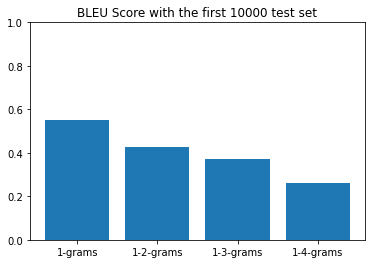

In [ ]:
plt.bar(x = bleu_test.keys(), height = bleu_test.values())
plt.title("BLEU Score with the first 10000 test set")
plt.ylim((0,1))
plt.show()

In [ ]:
print(bleu_test)

{'1-grams': 0.5531132200807165, '1-2-grams': 0.4280897648243376, '1-3-grams': 0.37261061449948585, '1-4-grams': 0.26261905350590725}


In [ ]:
!pip install jiwer
def word_for_id(integer, tokenizer):
    # map an integer to a word
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None
 
def predict_seq(model, tokenizer, source):
    # generate target from a source sequence
    prediction = model.predict(source, verbose=0)[0]
    integers = [np.argmax(vector) for vector in prediction]
    target = list()
    
    for i in integers:
        word = word_for_id(i, tokenizer)
        if word is None:
            break
        target.append(word)
    return ' '.join(target)

def compare_prediction(model, tokenizer, sources, raw_dataset, limit=20):
    # evaluate a model
    actual, predicted = [], []
    src = f'{source_str.upper()} (SOURCE)'
    tgt = f'{target_str.upper()} (TARGET)'
    pred = f'AUTOMATIC TRANSLATION IN {target_str.upper()}'
    #print(f'{src:30} {tgt:25} {pred}\n')
    
    for i, source in enumerate(sources): # translate encoded source text
        source = source.reshape((1, source.shape[0]))
        translation = predict_seq(model, tar_tokenizer, source)
        raw_target, raw_src = raw_dataset[i]
        #print(f'{raw_src:30} {raw_target:25} {translation}')
        #print(translation)     #predicit
        #print(raw_target)      #actual
        actual.append(raw_target)
        predicted.append(translation)
        if i >= limit: # Display some of the result
            return actual,predicted
            break
 
# # test on some training sequences!pip install jiwer
# print('### Result on the Training Set ###')
# compare_prediction(model, tar_tokenizer, trainX, train)

# test on some test sequences
print('\n\n### Result on the Test Set ###')
Actual,Predicted=compare_prediction(model, tar_tokenizer, testX,test[:10000,:])

     |████████████████████████████████| 50 kB 2.0 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149866 sha256=26ee384c0ea5de4e23738258cbd1ecd36ec0d1e01ea0bff5bf988d23e1b0bb26
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


### Result on the Test Set ###


In [ ]:
from jiwer import wer
error=wer(Actual,Predicted)
error

0.3402061855670103

In [ ]:
!pip install pyter3
import pyter

In [ ]:
i=0
sum=0
while i<len(Actual):
  #print(pyter.ter(Actual[i].split(),Predicted[i].split()))
  sum+=pyter.ter(Actual[i].split(),Predicted[i].split())
  i=i+1



sum=sum/len(Actual)
sum

0.3597505668934241